<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/Lesson%203.%20RNN%20(LSTM%2C%20GRU%2C%20BiRNN)/3_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_RNN_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практика RNN в задачах NLP

## Введение в NLP и RNN

Обработка естественного языка (NLP) — это область искусственного интеллекта, сосредоточенная на взаимодействии между компьютерами и людьми с использованием естественного языка. Задачи NLP включают в себя:

- **Классификация текстов** (например, определение тональности)
- **Генерация текста** (например, создание описаний или резюме)
- **Перевод текста** (перевод с одного языка на другой)
- **Анализ последовательностей** (например, определение части речи)

Рекуррентные нейронные сети (RNN) идеально подходят для задач NLP, так как они могут обрабатывать последовательные данные и учитывать контекст предыдущих элементов последовательности. В рамках данной лекции мы рассмотрим несколько архитектур RNN, таких как простая RNN, LSTM, GRU, Bidirectional RNN и их гибриды.

## Задачи NLP, решаемые с помощью RNN

1. **Классификация текстов**: Определение категории текста (например, новостная статья, блог и т.д.).
2. **Генерация текста**: Создание текста на основе заданного контекста.
3. **Перевод текста**: Перевод предложений с одного языка на другой.
4. **Извлечение сущностей**: Определение и классификация именованных сущностей в тексте.




## Постановка задачи

### Задача

Мы будем решать задачу классификации текстов на основе их тональности, используя простую рекуррентную нейронную сеть (RNN). Задача состоит в том, чтобы классифицировать отзывы о фильмах как положительные (1) или отрицательные (0).

### Цели проекта:

1. **Сбор данных**: Создание небольшого датасета с отзывами о фильмах.
2. **Предобработка данных**: Очистка и преобразование текстов в формат, подходящий для обучения модели.
3. **Создание модели RNN**: Реализация модели для классификации текстов.
4. **Обучение модели**: Обучение модели на тренировочных данных.
5. **Оценка производительности**: Вычисление метрик точности и потерь, а также визуализация результатов.
6. **Оптимизация модели**: Настройка параметров модели для улучшения производительности.




## RNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9193 - loss: 0.6453 - val_accuracy: 0.3333 - val_loss: 0.7670
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8438 - loss: 0.5563 - val_accuracy: 0.3333 - val_loss: 0.8284
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8220 - loss: 0.5056 - val_accuracy: 0.3333 - val_loss: 0.8977
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.3333 - loss: 0.7670
Тестовая точность: 0.3333, Тестовые потери: 0.7670


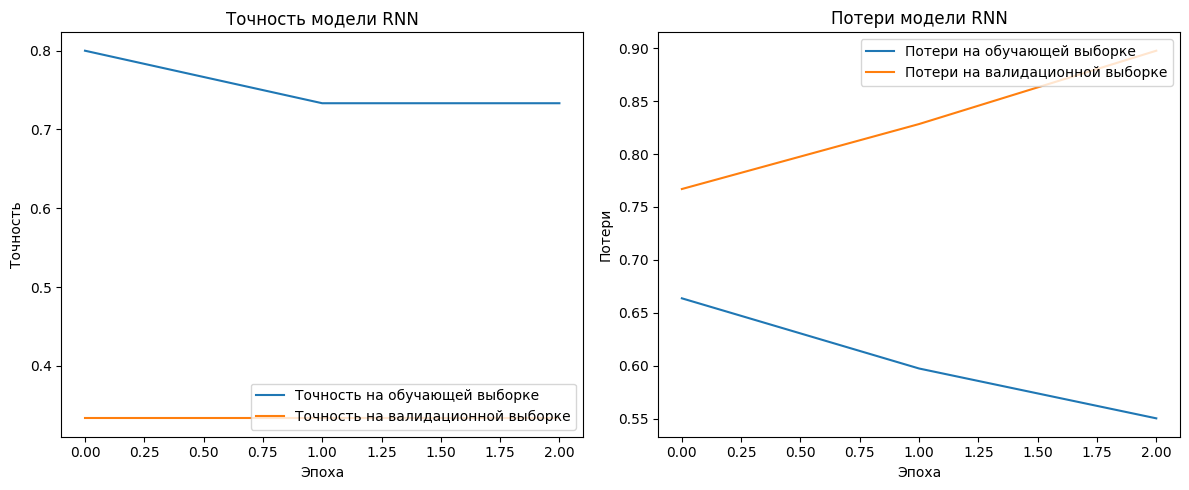

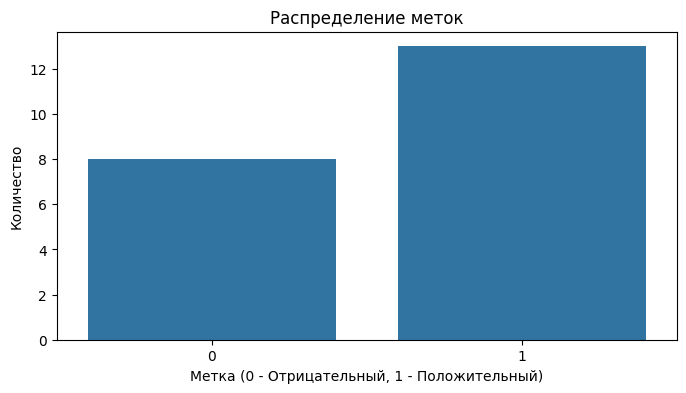

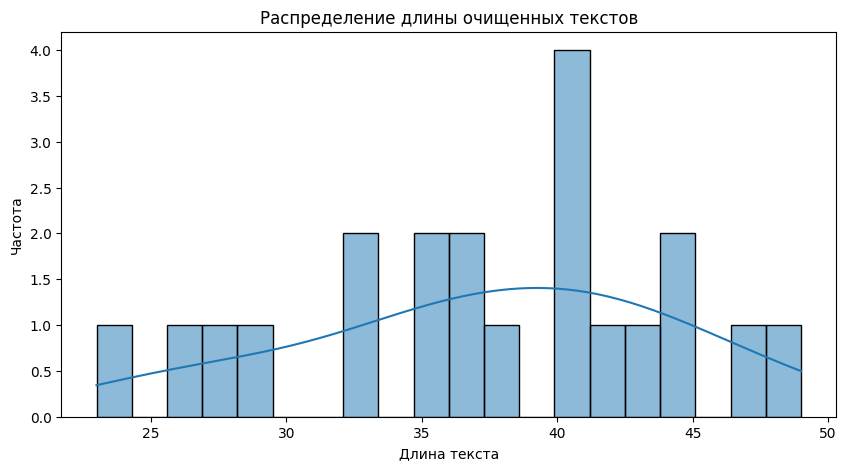

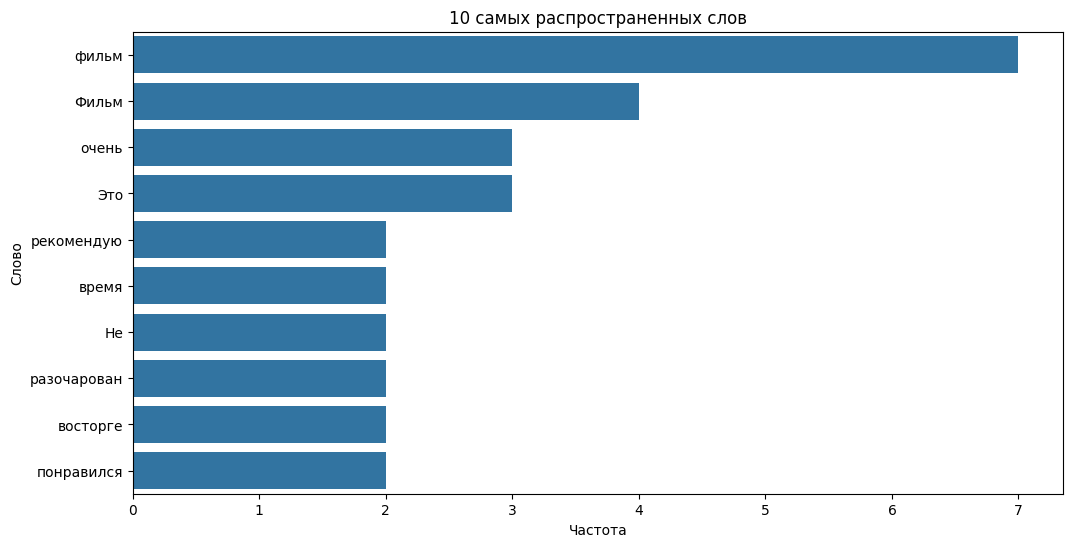

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа, рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf  # Импорт TensorFlow
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisRNN:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на совпадение длины списков 'text' и 'label'
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и предварительная обработка текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление нежелательных символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление специальных символов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предварительной обработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика длины текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Уникальное количество слов

        # Создание модели RNN
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Слой встраивания
        self.model.add(tf.keras.layers.SimpleRNN(32))  # Рекуррентный слой
        self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Настройка обратного вызова для ранней остановки
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели RNN')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели RNN')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг для новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Прогнозирование на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisRNN(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа, рекомендую."
    ]

    # Прогнозирование на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

Давайте подробно разберем каждую строку предоставленного кода для анализа тональности с использованием рекуррентной нейронной сети (RNN). Этот код состоит из импортируемых библиотек, класса `SentimentAnalysisRNN`, который содержит методы для обработки данных, построения модели и её обучения, а также основной программы, которая использует этот класс.

### Импорт библиотек

```python
import numpy as np  
```
- Импортирует библиотеку NumPy, которая используется для работы с многомерными массивами и матрицами, а также для выполнения математических операций.

```python
import pandas as pd
```
- Импортирует библиотеку Pandas, которая используется для работы с табличными данными и позволяет удобно манипулировать данными с помощью структур данных, таких как DataFrame.

```python
import matplotlib.pyplot as plt
```
- Импортирует библиотеку Matplotlib, которая используется для визуализации данных. `pyplot` предоставляет функции для создания графиков и диаграмм.

```python
import seaborn as sns
```
- Импортирует библиотеку Seaborn, основанную на Matplotlib, для более красивой визуализации статистических данных. Seaborn делает графики более привлекательными и легкими для понимания.

```python
import re
```
- Импортирует модуль регулярных выражений (regex) для обработки строк, что позволяет выполнять сложные операции поиска и замены.

```python
from sklearn.model_selection import train_test_split
```
- Импортирует функцию `train_test_split` из библиотеки Scikit-learn, которая используется для разделения данных на обучающую и тестовую выборки.

```python
import tensorflow as tf  # Импорт TensorFlow
```
- Импортирует библиотеку TensorFlow, популярный фреймворк для машинного обучения и глубокого обучения. Он будет использоваться для создания и обучения нейронной сети.

```python
from nltk.corpus import stopwords
```
- Импортирует стоп-слова из библиотеки NLTK (Natural Language Toolkit), которые представляют собой распространенные слова, часто исключаемые из текстов, такие как "и", "в", "на" и т. д.

```python
import nltk
```
- Импортирует саму библиотеку NLTK, которая предоставляет инструменты для работы с естественным языком.

```python
# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')
```
- Загрузка списка стоп-слов для русского языка. Этот список будет использоваться для фильтрации текста.

### Определение класса SentimentAnalysisRNN

```python
class SentimentAnalysisRNN:
```
- Объявление класса `SentimentAnalysisRNN`, который будет содержать методы для анализа тональности.

```python
def __init__(self, data, embedding_dim=8, max_words=100):
```
- Конструктор класса. `data` — это входные данные, `embedding_dim` — размерность встраивания (обычно используется для представления слов в векторном пространстве), а `max_words` — максимальное количество слов, которое будет использоваться для токенизации.

```python
self.data = data
self.embedding_dim = embedding_dim
self.max_words = max_words
self.model = None
self.tokenizer = None
self.max_length = None
self.X_train_pad = None
self.X_test_pad = None
```
- Инициализация атрибутов класса. Здесь сохраняются данные, размеры встраивания, модель, токенизатор и параметры для паддинга.

### Предобработка данных

```python
def preprocess_data(self):
```
- Определение метода для предобработки данных.

```python
if len(self.data['text']) != len(self.data['label']):
    raise ValueError("Длина списков 'text' и 'label' не совпадает!")
```
- Проверка, совпадают ли длины списков текста и меток. Если нет, выбрасывается ошибка.

```python
df = pd.DataFrame(self.data)
```
- Создание DataFrame из входных данных для удобной обработки.

```python
df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр
```
- Преобразование текста в нижний регистр, чтобы избежать различий в написании (например, "Фильм" и "фильм").

```python
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)
```
- Разделение данных на обучающую (75%) и тестовую (25%) выборки.

```python
self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=self.max_words)
```
- Создание экземпляра токенизатора с заданным максимальным количеством слов.

```python
self.tokenizer.fit_on_texts(X_train)
```
- Подгонка токенизатора на обучающих данных, что позволяет создать словарь слов.

```python
X_train_seq = self.tokenizer.texts_to_sequences(X_train)
X_test_seq = self.tokenizer.texts_to_sequences(X_test)
```
- Преобразование текста в последовательности чисел, где каждое слово заменяется соответствующим индексом из словаря.

```python
self.max_length = max(len(x) for x in X_train_seq)
```
- Определение максимальной длины последовательностей в обучающем наборе данных.

```python
self.X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
self.X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')
```
- Паддинг последовательностей, чтобы они все имели одинаковую длину. Если длина последовательности меньше максимальной, добавляются нули (или другие заданные символы) в конце.

```python
return y_train, y_test
```
- Возвращение меток для обучающей и тестовой выборок.

### Очистка текста

```python
def clean_text(self, text):
```
- Определение метода для очистки текста от нежелательных символов.

```python
text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление специальных символов
```
- Удаление специальных символов с помощью регулярных выражений.

```python
text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
```
- Удаление лишних пробелов в тексте.

```python
text = text.strip()  # Удаление пробелов в начале и конце
```
- Удаление пробелов в начале и конце текста.

```python
return text
```
- Возвращение очищенного текста.

### Выполнение анализа данных (EDA)

```python
def perform_eda(self):
```
- Определение метода для выполнения разведывательного анализа данных.

```python
df = pd.DataFrame(self.data)
```
- Создание DataFrame для анализа.

```python
df['cleaned_text'] = df['text'].apply(self.clean_text)
```
- Применение метода очистки текста ко всем записям в DataFrame.

```python
stop_words = set(stopwords.words('russian'))
```
- Загрузка стоп-слов для русского языка.

```python
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
```
- Удаление стоп-слов из очищенного текста.

#### Визуализация

```python
# 1. Распределение меток
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df)
plt.title('Распределение меток')
plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
plt.ylabel('Количество')
plt.show()
```
- Создание графика распределения меток (положительные и отрицательные отзывы).

```python
# 2. Статистика длины текстов
df['text_length'] = df['cleaned_text'].str.len()
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Распределение длины очищенных текстов')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()
```
- Построение гистограммы длины очищенных текстов.

```python
# 3. Частота слов
all_words = ' '.join(df['cleaned_text'])
word_counts = pd.Series(all_words.split()).value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
plt.title('10 самых распространенных слов')
plt.xlabel('Частота')
plt.ylabel('Слово')
plt.show()
```
- Построение графика, отображающего 10 самых распространенных слов.

```python
# 4. Примеры положительных и отрицательных отзывов
positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

print("Примеры положительных отзывов:")
print(positive_reviews['cleaned_text'].to_string(index=False))
print("\nПримеры отрицательных отзывов:")
print(

negative_reviews['cleaned_text'].to_string(index=False))
```
- Выбор случайных примеров положительных и отрицательных отзывов и их вывод.

### Построение модели

```python
def build_model(self):
```
- Определение метода для создания модели.

```python
vocab_size = len(self.tokenizer.word_index) + 1  # Уникальное количество слов
```
- Определение размера словаря (количества уникальных слов).

```python
self.model = tf.keras.models.Sequential()
```
- Создание последовательной модели в Keras.

```python
self.model.add(tf.keras.layers.Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Слой встраивания
```
- Добавление слоя встраивания, который преобразует слова в векторы фиксированной длины.

```python
self.model.add(tf.keras.layers.SimpleRNN(32))  # Рекуррентный слой
```
- Добавление рекуррентного слоя, который будет обрабатывать последовательности.

```python
self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Выходной слой
```
- Добавление выходного слоя с сигмоидной активацией для бинарной классификации (положительные или отрицательные отзывы).

```python
self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```
- Компиляция модели, где указывается функция потерь, оптимизатор и метрики.

### Обучение модели

```python
def train_model(self, y_train, y_test):
```
- Определение метода для обучения модели.

```python
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
```
- Настройка обратного вызова для ранней остановки, чтобы избежать переобучения.

```python
history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                         validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])
```
- Обучение модели на подготовленных данных. Указаны количество эпох, размер пакета и данные для валидации.

```python
return history
```
- Возвращение истории обучения (показатели точности и потерь).

### Оценка модели

```python
def evaluate_model(self, y_test):
```
- Определение метода для оценки модели на тестовой выборке.

```python
test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
```
- Оценка модели и получение значений потерь и точности.

```python
print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")
```
- Вывод результатов оценки.

### Визуализация метрик

```python
def plot_metrics(self, history):
```
- Определение метода для визуализации метрик обучения.

```python
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность модели RNN')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(loc='lower right')
```
- Построение графика для точности на обучающей и валидационной выборках.

```python
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.title('Потери модели RNN')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(loc='upper right')
```
- Построение графика для потерь на обучающей и валидационной выборках.

```python
plt.tight_layout()
plt.show()
```
- Упаковка графиков и отображение их.

### Прогнозирование тональности

```python
def predict_sentiment(self, new_reviews):
```
- Определение метода для предсказания тональности на новых отзывах.

```python
new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
new_reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')
```
- Токенизация и паддинг новых отзывов для соответствия формату входных данных модели.

```python
predictions = self.model.predict(new_reviews_pad)
predicted_labels = (predictions > 0.5).astype(int)
```
- Прогнозирование тональности новых отзывов и преобразование вероятностей в бинарные метки (0 или 1).

```python
results = []
for review, prediction in zip(new_reviews, predicted_labels):
    sentiment = "Положительный" if prediction == 1 else "Отрицательный"
    results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")
```
- Формирование списка результатов, где каждому отзыву соответствует предсказанная тональность.

```python
return results
```
- Возвращение результатов предсказания.

### Пример использования класса

```python
if __name__ == "__main__":
```
- Проверка, запущен ли скрипт как основная программа.

```python
data = {
    'text': [ ... ],
    'label': [ ... ]
}
```
- Задание данных в виде словаря, где `text` — это список отзывов, а `label` — метки тональности.

```python
sentiment_model = SentimentAnalysisRNN(data)
```
- Создание экземпляра класса `SentimentAnalysisRNN` с заданными данными.

```python
y_train, y_test = sentiment_model.preprocess_data()
```
- Вызов метода для предобработки данных и получение меток для обучающей и тестовой выборок.

```python
sentiment_model.build_model()
```
- Вызов метода для построения модели.

```python
history = sentiment_model.train_model(y_train, y_test)
```
- Обучение модели на подготовленных данных.

```python
sentiment_model.evaluate_model(y_test)
```
- Оценка модели на тестовой выборке.

```python
sentiment_model.plot_metrics(history)
```
- Визуализация метрик обучения.

```python
sentiment_model.perform_eda()
```
- Выполнение разведывательного анализа данных.

```python
new_reviews = [ ... ]
```
- Подготовка новых отзывов для прогнозирования.

```python
predictions = sentiment_model.predict_sentiment(new_reviews)
```
- Прогнозирование тональности на новых данных.

```python
for result in predictions:
    print(result)
```
- Вывод результатов предсказания.

Таким образом, код реализует полноценный pipeline для анализа тональности текстов, начиная с предобработки данных, построения и обучения модели, а также визуализации результатов и прогнозирования на новых данных.

## LSTM

Epoch 1/10


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.6427 - loss: 0.6902 - val_accuracy: 0.3333 - val_loss: 0.7046
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8067 - loss: 0.6689 - val_accuracy: 0.3333 - val_loss: 0.7209
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7512 - loss: 0.6534 - val_accuracy: 0.3333 - val_loss: 0.7405
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3333 - loss: 0.7046
Тестовая точность: 0.3333, Тестовые потери: 0.7046


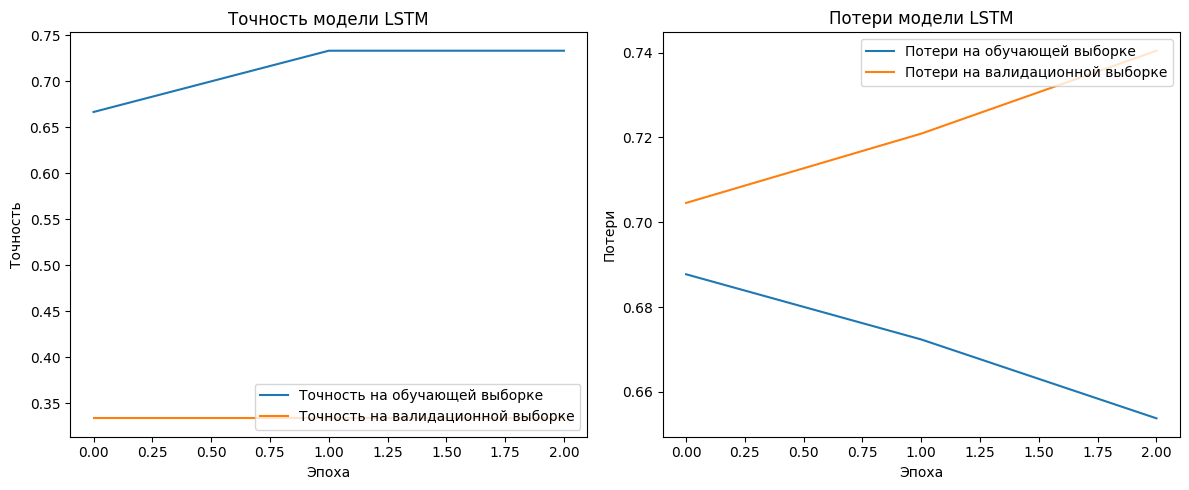

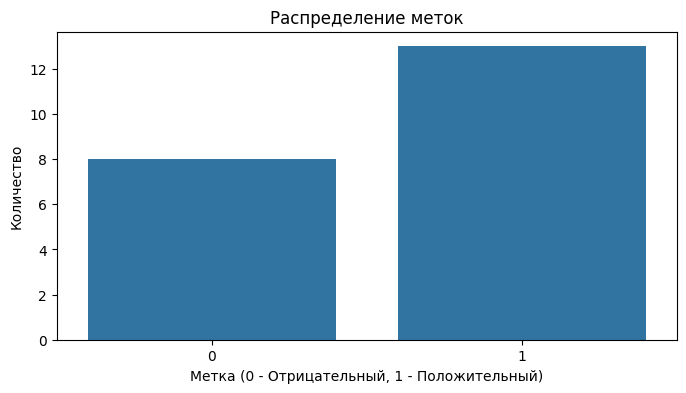

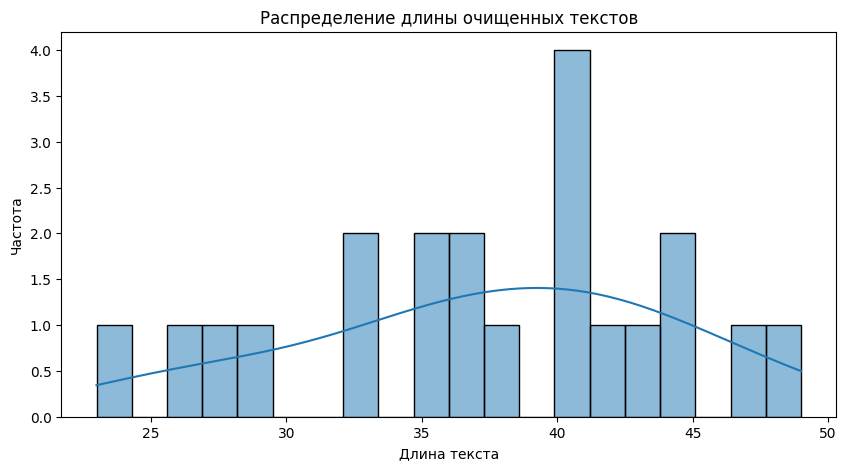

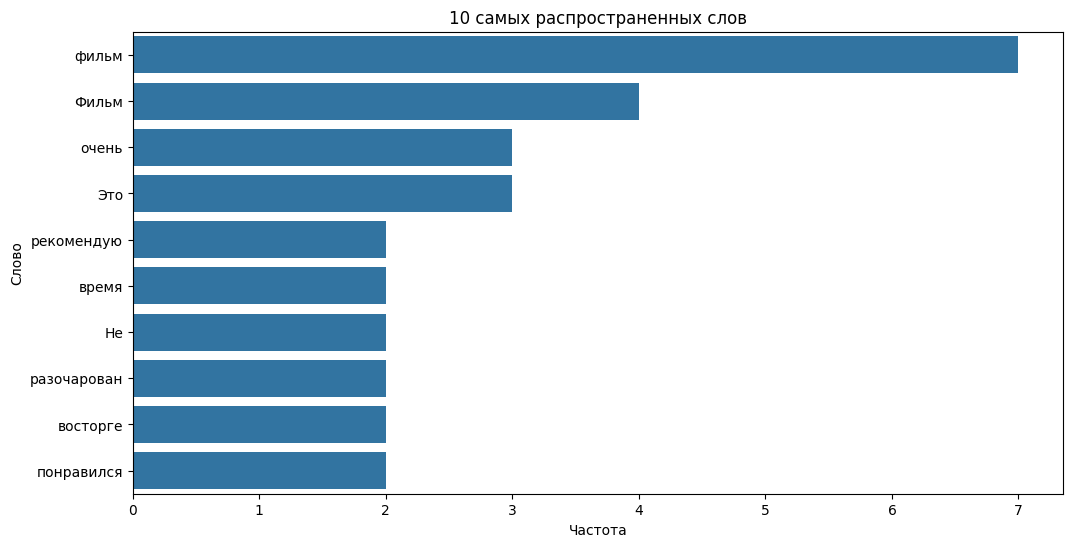

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisLSTM:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели LSTM
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(LSTM(32))  # LSTM слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели LSTM')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели LSTM')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisLSTM(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

#GRU

Epoch 1/10


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.4394 - loss: 0.6901 - val_accuracy: 0.3333 - val_loss: 0.7061
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7414 - loss: 0.6721 - val_accuracy: 0.3333 - val_loss: 0.7219
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7544 - loss: 0.6512 - val_accuracy: 0.3333 - val_loss: 0.7472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3333 - loss: 0.7061
Тестовая точность: 0.3333, Тестовые потери: 0.7061


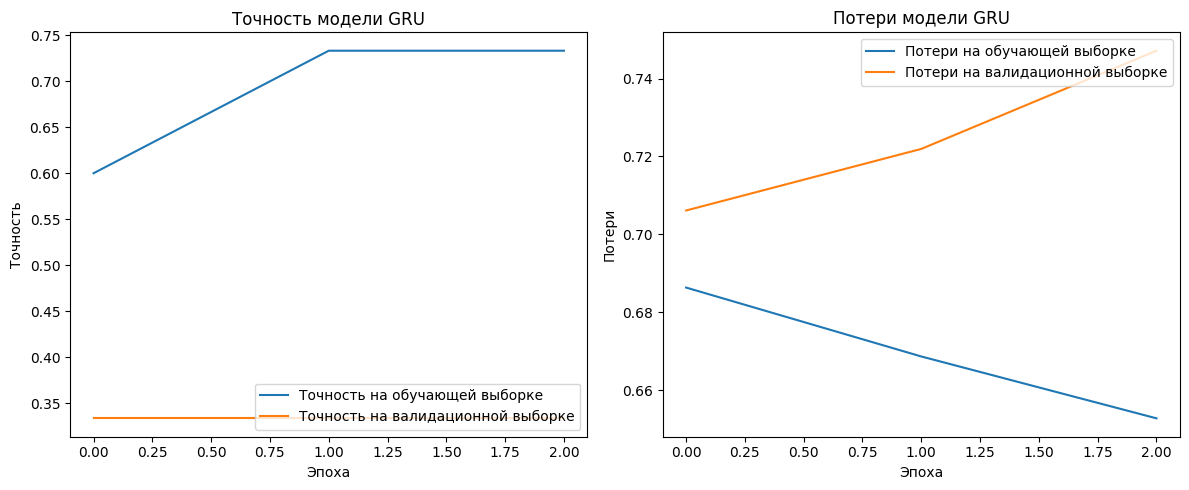

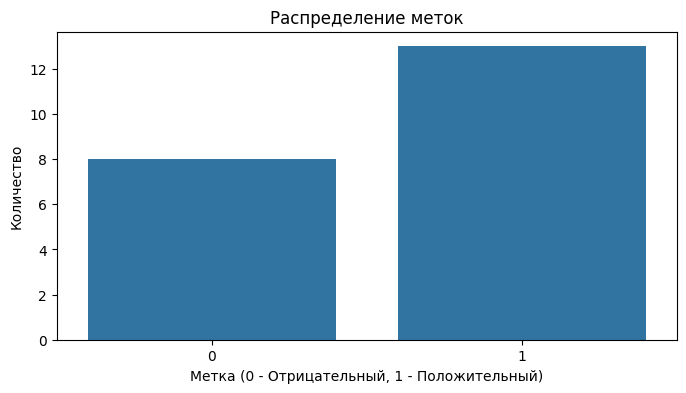

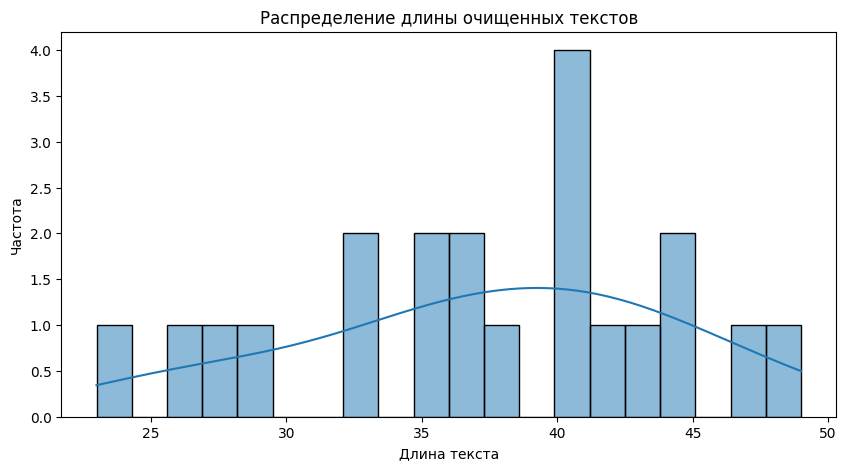

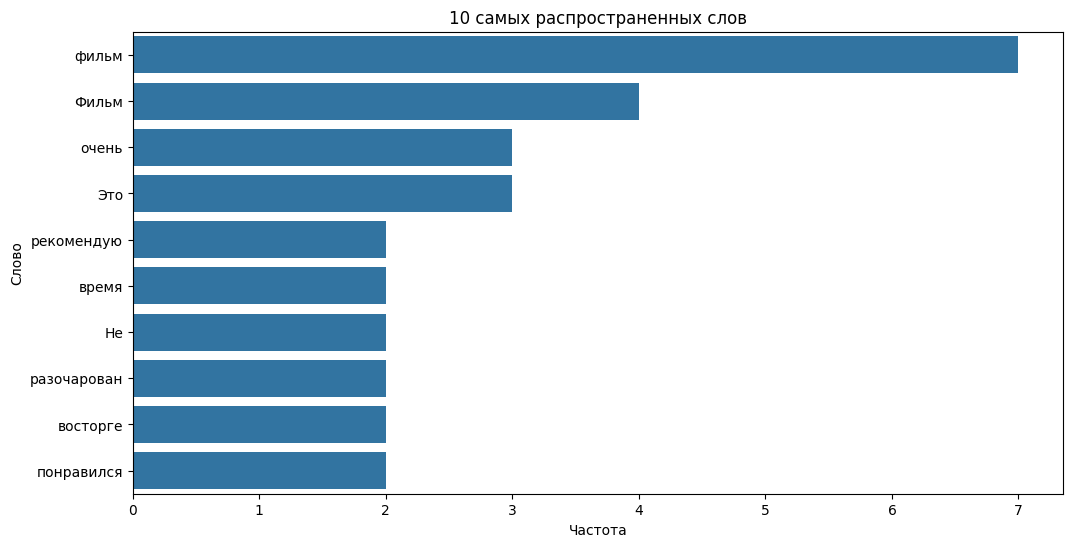

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisGRU:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели GRU
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(GRU(32))  # GRU слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели GRU')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели GRU')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisGRU(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

#BiRNN

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7308 - loss: 0.6880 - val_accuracy: 0.3333 - val_loss: 0.7115
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7507 - loss: 0.6659 - val_accuracy: 0.3333 - val_loss: 0.7276
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8021 - loss: 0.6366 - val_accuracy: 0.3333 - val_loss: 0.7578
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step - accuracy: 0.3333 - loss: 0.7115
Тестовая точность: 0.3333, Тестовые потери: 0.7115


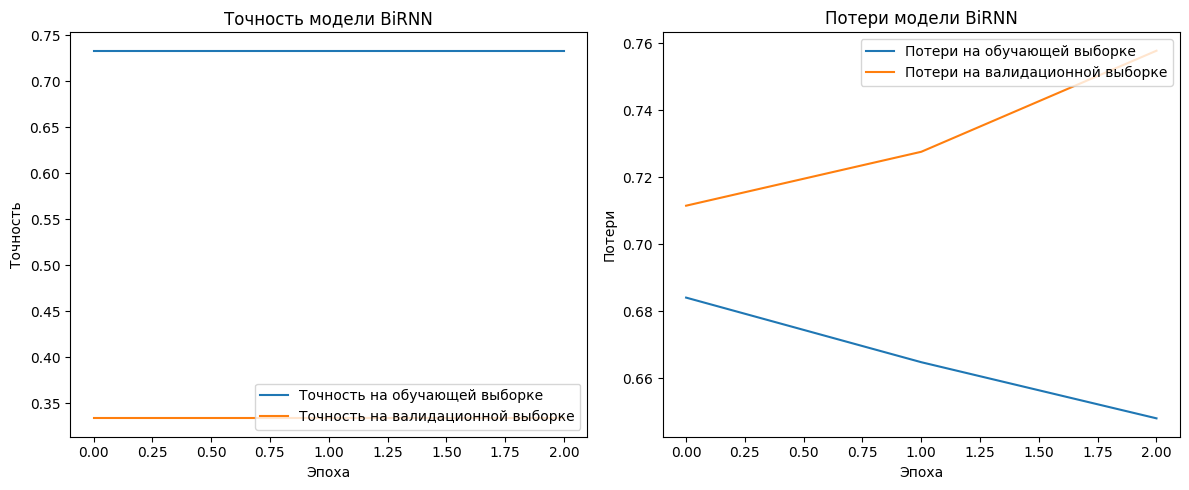

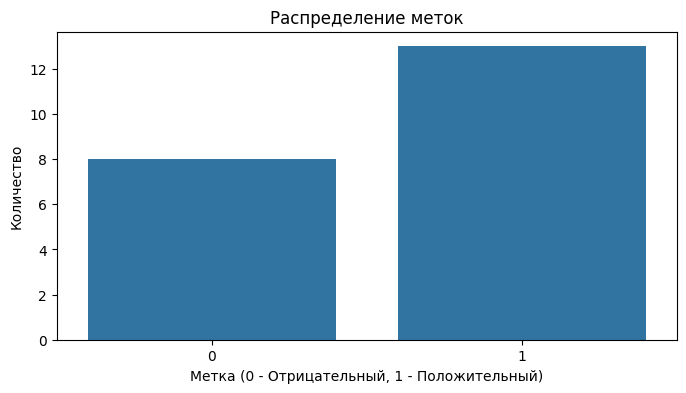

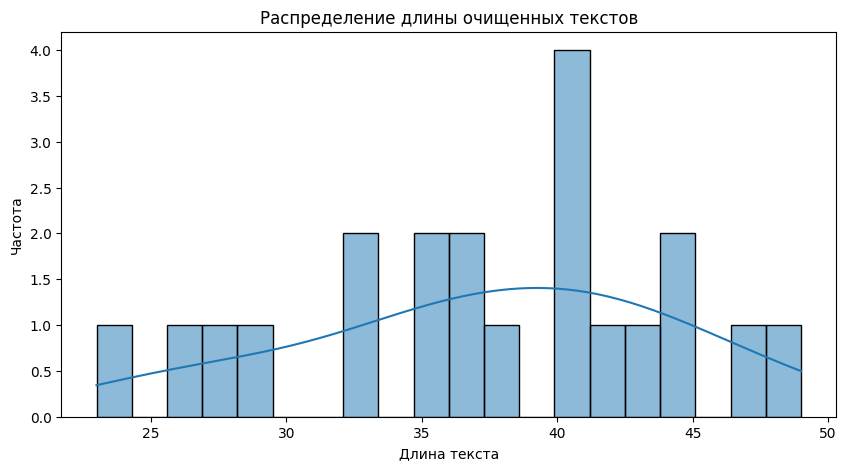

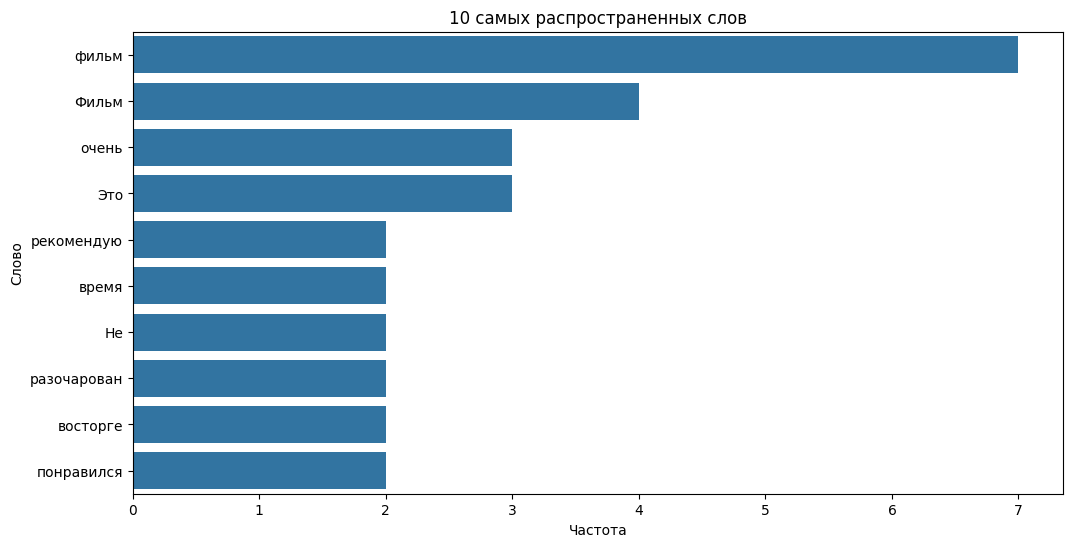

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisBiRNN:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели BiRNN
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(Bidirectional(GRU(32)))  # Bidirectional GRU слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели BiRNN')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели BiRNN')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisBiRNN(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

## Гибрыдный модель

Epoch 1/10


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.7604 - loss: 0.6876 - val_accuracy: 0.3333 - val_loss: 0.7152
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6488 - loss: 0.6712 - val_accuracy: 0.3333 - val_loss: 0.7361
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8062 - loss: 0.6267 - val_accuracy: 0.3333 - val_loss: 0.7992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.3333 - loss: 0.7152
Тестовая точность: 0.3333, Тестовые потери: 0.7152


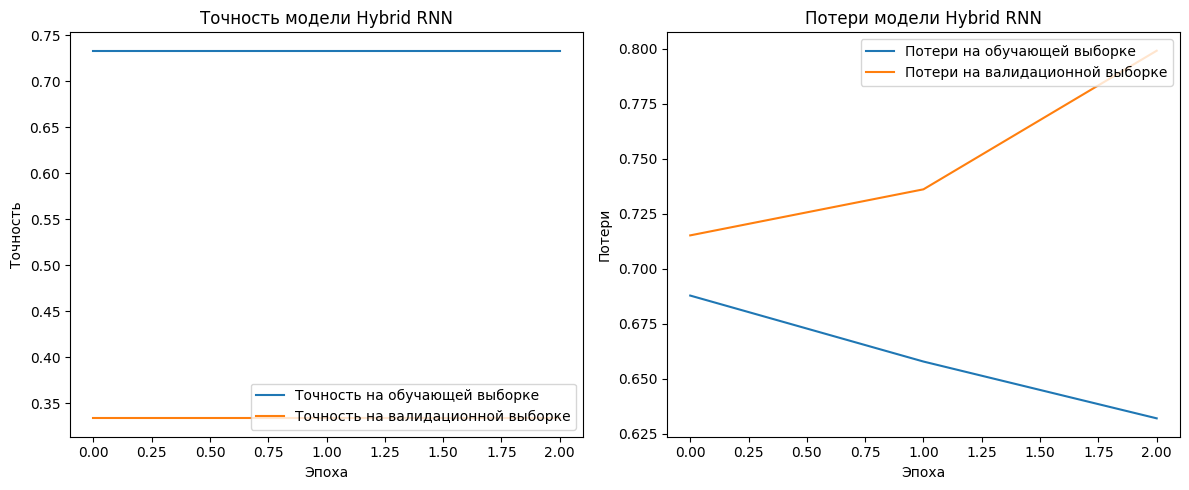

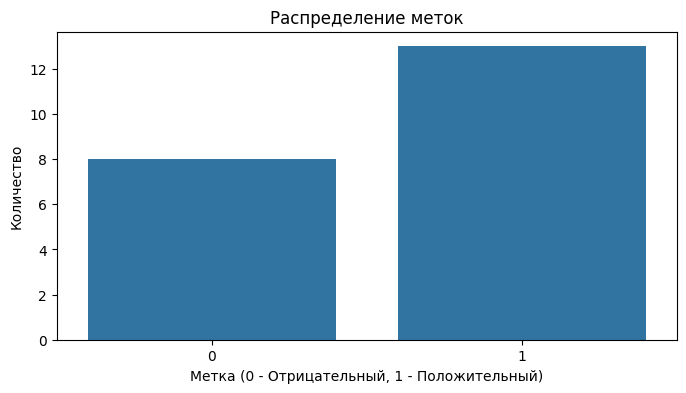

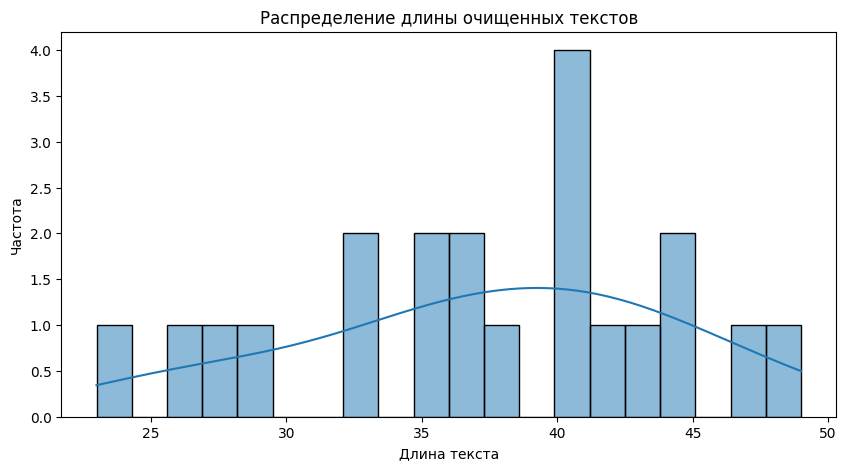

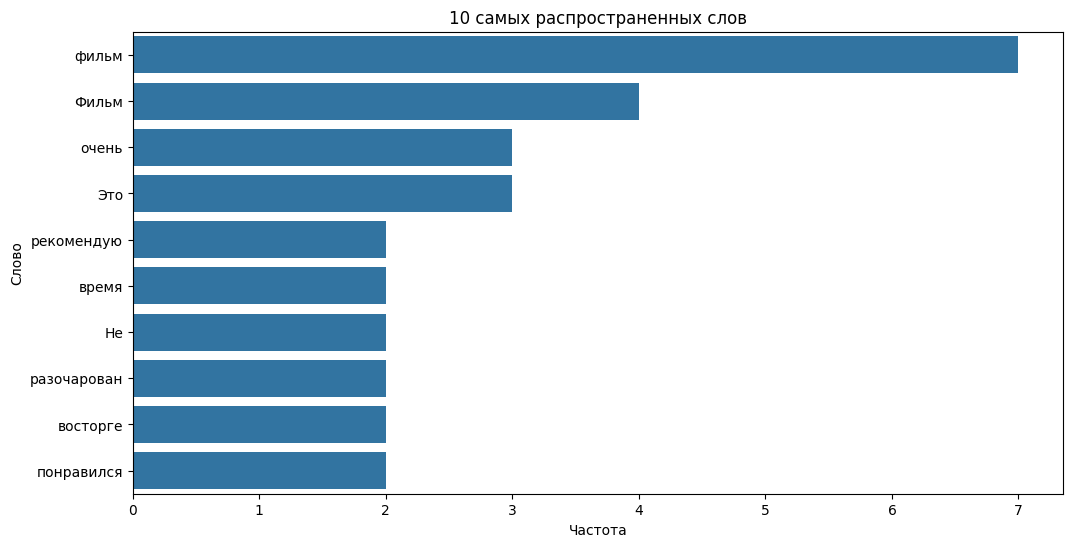

Примеры положительных отзывов:
               Лучший фильм года восторге
        Это шедевр Обязательно пересмотрю
Этот фильм замечательным очень интересным
 Мне понравилась музыка атмосферные сцены
    Сюжет закрученный очень захватывающий

Примеры отрицательных отзывов:
         Не тратьте время фильм ужасен
Зачем снимать такое Сильно разочарован
          Мне понравился фильм скучным
   Полный провал советую тратить время
   Это настоящая катастрофа рекомендую
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
Отзыв: "Фильм был отличным, я был в восторге!" - Предсказанная тональность: Положительный
Отзыв: "Совершенно неинтересный, лучше не смотреть." - Предсказанная тональность: Положительный
Отзыв: "Это шедевр! Актеры сыграли великолепно." - Предсказанная тональность: Положительный
Отзыв: "Это настоящая катастрофа рекомендую." - Предсказанная тональность: Положительный


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import nltk

# Убедитесь, что стоп-слова загружены
nltk.download('stopwords')

class SentimentAnalysisHybridRNN:
    def __init__(self, data, embedding_dim=8, max_words=100):
        self.data = data
        self.embedding_dim = embedding_dim
        self.max_words = max_words
        self.model = None
        self.tokenizer = None
        self.max_length = None
        self.X_train_pad = None
        self.X_test_pad = None

    def preprocess_data(self):
        # Проверка на соответствие длины списков
        if len(self.data['text']) != len(self.data['label']):
            raise ValueError("Длина списков 'text' и 'label' не совпадает!")

        # Создание DataFrame и преобразование текста
        df = pd.DataFrame(self.data)
        df['text'] = df['text'].str.lower()  # Преобразование в нижний регистр

        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

        # Токенизация
        self.tokenizer = Tokenizer(num_words=self.max_words)
        self.tokenizer.fit_on_texts(X_train)

        # Преобразование текста в последовательности
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)

        # Паддинг
        self.max_length = max(len(x) for x in X_train_seq)
        self.X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        self.X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')

        return y_train, y_test

    def clean_text(self, text):
        # Удаление лишних символов и преобразование в нижний регистр
        text = re.sub(r'[@#$%^&*()_+=\-.,!?]', '', text)  # Удаление спецсимволов
        text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
        text = text.strip()  # Удаление пробелов в начале и конце
        return text

    def perform_eda(self):
        # Создание DataFrame для анализа
        df = pd.DataFrame(self.data)

        # Применение предобработки текста
        df['cleaned_text'] = df['text'].apply(self.clean_text)

        # Удаление стоп-слов
        stop_words = set(stopwords.words('russian'))
        df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

        # 1. Распределение меток
        plt.figure(figsize=(8, 4))
        sns.countplot(x='label', data=df)
        plt.title('Распределение меток')
        plt.xlabel('Метка (0 - Отрицательный, 1 - Положительный)')
        plt.ylabel('Количество')
        plt.show()

        # 2. Статистика по длине текстов
        df['text_length'] = df['cleaned_text'].str.len()
        plt.figure(figsize=(10, 5))
        sns.histplot(df['text_length'], bins=20, kde=True)
        plt.title('Распределение длины очищенных текстов')
        plt.xlabel('Длина текста')
        plt.ylabel('Частота')
        plt.show()

        # 3. Частота слов
        all_words = ' '.join(df['cleaned_text'])
        word_counts = pd.Series(all_words.split()).value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=word_counts.values[:10], y=word_counts.index[:10])
        plt.title('10 самых распространенных слов')
        plt.xlabel('Частота')
        plt.ylabel('Слово')
        plt.show()

        # 4. Примеры положительных и отрицательных отзывов
        positive_reviews = df[df['label'] == 1].sample(5, random_state=42)
        negative_reviews = df[df['label'] == 0].sample(5, random_state=42)

        print("Примеры положительных отзывов:")
        print(positive_reviews['cleaned_text'].to_string(index=False))
        print("\nПримеры отрицательных отзывов:")
        print(negative_reviews['cleaned_text'].to_string(index=False))

    def build_model(self):
        # Параметры модели
        vocab_size = len(self.tokenizer.word_index) + 1  # Количество уникальных слов

        # Создание модели Hybrid RNN
        self.model = Sequential()
        self.model.add(Embedding(vocab_size, self.embedding_dim, input_length=self.max_length))  # Эмбеддинговый слой
        self.model.add(GRU(32, return_sequences=True))  # Первый GRU слой
        self.model.add(Dropout(0.2))  # Слой Dropout для регуляризации
        self.model.add(LSTM(32))  # LSTM слой
        self.model.add(Dense(1, activation='sigmoid'))  # Выходной слой

        # Компиляция модели
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, y_train, y_test):
        # Установка обратного вызова для ранней остановки
        early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        # Обучение модели
        history = self.model.fit(self.X_train_pad, y_train, epochs=10, batch_size=2,
                                 validation_data=(self.X_test_pad, y_test), callbacks=[early_stopping])

        return history

    def evaluate_model(self, y_test):
        # Оценка модели на тестовой выборке
        test_loss, test_accuracy = self.model.evaluate(self.X_test_pad, y_test)
        print(f"Тестовая точность: {test_accuracy:.4f}, Тестовые потери: {test_loss:.4f}")

    def plot_metrics(self, history):
        # График точности
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
        plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
        plt.title('Точность модели Hybrid RNN')
        plt.ylabel('Точность')
        plt.xlabel('Эпоха')
        plt.legend(loc='lower right')

        # График потерь
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Потери на обучающей выборке')
        plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
        plt.title('Потери модели Hybrid RNN')
        plt.ylabel('Потери')
        plt.xlabel('Эпоха')
        plt.legend(loc='upper right')

        plt.tight_layout()
        plt.show()

    def predict_sentiment(self, new_reviews):
        # Токенизация и паддинг новых данных
        new_reviews_seq = self.tokenizer.texts_to_sequences(new_reviews)
        new_reviews_pad = pad_sequences(new_reviews_seq, maxlen=self.max_length, padding='post')

        # Предсказание на новых данных
        predictions = self.model.predict(new_reviews_pad)
        predicted_labels = (predictions > 0.5).astype(int)

        # Вывод результатов
        results = []
        for review, prediction in zip(new_reviews, predicted_labels):
            sentiment = "Положительный" if prediction == 1 else "Отрицательный"
            results.append(f"Отзыв: \"{review}\" - Предсказанная тональность: {sentiment}")

        return results

# Пример использования класса
if __name__ == "__main__":
    data = {
        'text': [
            "Этот фильм был замечательным и очень интересным",  # 1
            "Мне не понравился этот фильм, он был скучным",      # 0
            "Отличная работа актеров и сценарий был великолепным", # 1
            "Не тратьте время на этот фильм, он ужасен",        # 0
            "Фильм мне очень понравился, я буду его смотреть снова", # 1
            "Это была настоящая катастрофа, не рекомендую",     # 0
            "Замечательная комедия, я смеялся весь фильм",       # 1
            "Фильм не оправдал моих ожиданий, разочарован",      # 0
            "Прекрасная работа режиссера, замечательные пейзажи", # 1
            "Сюжет закрученный и очень захватывающий",           # 1
            "Я был в восторге от актерской игры, просто потрясающе!", # 1
            "Не могу поверить, что кто-то может назвать этот фильм хорошим", # 0
            "Фильм оставил яркие впечатления, рекомендую всем!",  # 1
            "Зачем было снимать такое? Сильно разочарован!",      # 0
            "Мне понравилась музыка и атмосферные сцены",         # 1
            "Это было просто ужасно, никогда не пойду на такие фильмы", # 0
            "Это шедевр! Обязательно пересмотрю",                 # 1
            "Полный провал, не советую тратить время",            # 0
            "Хороший фильм для семейного просмотра",              # 1
            "Лучший фильм года, я в восторге!",                   # 1
            "Фильм не такой уж и плохой, есть свои плюсы"        # 1
        ],
        'label': [
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
            1
        ]
    }

    sentiment_model = SentimentAnalysisHybridRNN(data)
    y_train, y_test = sentiment_model.preprocess_data()
    sentiment_model.build_model()
    history = sentiment_model.train_model(y_train, y_test)
    sentiment_model.evaluate_model(y_test)
    sentiment_model.plot_metrics(history)

    # Выполнение EDA
    sentiment_model.perform_eda()

    # Шаг 1: Подготовка новых данных
    new_reviews = [
        "Фильм был отличным, я был в восторге!",
        "Совершенно неинтересный, лучше не смотреть.",
        "Это шедевр! Актеры сыграли великолепно.",
        "Это настоящая катастрофа рекомендую."
    ]

    # Шаг 3: Предсказание на новых данных
    predictions = sentiment_model.predict_sentiment(new_reviews)
    for result in predictions:
        print(result)

### Задача
В данной работе рассматривается задача анализа тональности текстов с использованием рекуррентных нейронных сетей (RNN). Основная цель заключается в разработке модели, способной классифицировать тексты новостей об экономике США по заданным меткам тональности. Процесс включает в себя несколько ключевых этапов: предварительная обработка текстовых данных, разделение датасета на обучающую, валидационную и тестовую выборки, построение и обучение модели RNN, а также оценка её производительности.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Убедитесь, что необходимые ресурсы загружены
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

class TextPreprocessor:
    def __init__(self, language='english'):
        self.language = language
        self.stop_words = set(stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Удаляет специальные символы и приводит текст к нижнему регистру."""
        text = text.lower()
        text = re.sub(r'[@#\$\%\^\&\*\(\)\[\]\{\}<>\\\/\+\=\-\:\;\,\.\'\"`~]', '', text)
        return text

    def remove_stopwords(self, text):
        """Удаляет стоп-слова из текста."""
        words = nltk.word_tokenize(text)
        words = [word for word in words if word not in self.stop_words]
        return ' '.join(words)

    def lemmatize_text(self, text):
        """Лемматизирует текст."""
        words = nltk.word_tokenize(text)
        lemmatized_words = [self.lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    def preprocess(self, text):
        """Объединяет все методы предварительной обработки."""
        if not text.strip():
            return None
        text = self.clean_text(text)
        text = self.remove_stopwords(text)
        text = self.lemmatize_text(text)
        return text

class DatasetSplitter:
    def __init__(self, df, text_column='cleaned_text', label_column='positivity', test_size=0.2, val_size=0.1, max_words=50000, max_len=250):
        """
        Инициализация класса DatasetSplitter.

        :param df: Датасет (pandas DataFrame).
        :param text_column: Название столбца с текстовыми данными.
        :param label_column: Название столбца с метками (если есть).
        :param test_size: Размер тестовой выборки (доля).
        :param val_size: Размер валидационной выборки (доля от обучающей).
        :param max_words: Максимальное количество слов для токенизатора.
        :param max_len: Максимальная длина последовательности.
        """
        self.df = df
        self.text_column = text_column
        self.label_column = label_column
        self.test_size = test_size
        self.val_size = val_size
        self.max_words = max_words
        self.max_len = max_len
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, lower=True)

    def tokenize_and_pad(self):
        """Токенизирует текстовые данные и применяет паддинг."""
        self.tokenizer.fit_on_texts(self.df[self.text_column].values)
        sequences = self.tokenizer.texts_to_sequences(self.df[self.text_column].values)
        X = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=self.max_len)
        y = self.df[self.label_column].fillna(0).values
        y = tf.one_hot(y.astype(int), depth=self.df[self.label_column].nunique())  # one-hot encoding меток
        return X, y

    def split_dataset(self):
        """Разделяет датасет на обучающую, валидационную и тестовую выборки с помощью tf.data.Dataset."""
        X, y = self.tokenize_and_pad()
        dataset = tf.data.Dataset.from_tensor_slices((X, y))

        # Shuffle и split на train, validation, test
        dataset = dataset.shuffle(buffer_size=len(X))
        test_size = int(self.test_size * len(dataset))
        val_size = int(self.val_size * (len(dataset) - test_size))
        train_size = len(dataset) - test_size - val_size

        train_dataset = dataset.take(train_size)
        val_dataset = dataset.skip(train_size).take(val_size)
        test_dataset = dataset.skip(train_size + val_size)

        return train_dataset.batch(64), val_dataset.batch(64), test_dataset.batch(64)

# Основной блок программы
if __name__ == "__main__":
    # Загрузка датасета
    file_path = '/content/US-Economic-News.csv'
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Предварительная обработка текста
    preprocessor = TextPreprocessor()
    df['cleaned_text'] = df['text'].apply(lambda x: preprocessor.preprocess(str(x)) if pd.notnull(x) else None)

    # Удаление строк с пустым `cleaned_text`
    df.dropna(subset=['cleaned_text'], inplace=True)

    # Разделение данных
    splitter = DatasetSplitter(df, text_column='cleaned_text', label_column='positivity', test_size=0.2, val_size=0.1)
    train_dataset, val_dataset, test_dataset = splitter.split_dataset()

    # Построение модели RNN
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(splitter.max_words, 100, input_length=splitter.max_len),
        tf.keras.layers.SpatialDropout1D(0.2),
        tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(df['positivity'].nunique(), activation='softmax')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    # Обучение модели
    epochs = 5
    history = model.fit(train_dataset,
                        epochs=epochs,
                        validation_data=val_dataset,
                        verbose=1)

    # Оценка модели
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Тестовая точность: {test_accuracy * 100:.2f}%")

    # Функция для предсказания
    def predict_text(text):
        text = preprocessor.preprocess(text)
        seq = splitter.tokenizer.texts_to_sequences([text])
        padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=splitter.max_len)
        pred = model.predict(padded)
        return np.argmax(pred, axis=1)

    # Пример прогноза
    sample_text = "Federal Reserve raised the interest rates amid inflation concerns."
    print(f'Прогнозируемая тональность текста: {predict_text(sample_text)}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 594ms/step - accuracy: 0.7631 - loss: 1.1962 - val_accuracy: 0.8000 - val_loss: 0.8290
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 48s 535ms/step - accuracy: 0.8341 - loss: 0.7274 - val_accuracy: 0.8047 - val_loss: 0.7960
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 593ms/step - accuracy: 0.8303 - loss: 0.7263 - val_accuracy: 0.8094 - val_loss: 0.7210
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 621ms/step - accuracy: 0.8363 - loss: 0.6238 - val_accuracy: 0.8203 - val_loss: 0.5943
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 607ms/step - accuracy: 0.8453 - loss: 0.5217 - val_accuracy: 0.8500 - val_loss: 0.4615
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.8389 - loss: 0.4783
Тестовая точность: 83.81%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Прогнозируемая тональность текста: [0]


### Кластеризация текста

### Постановка задачи

В данной работе рассматривается задача кластеризации текстовых данных, в частности, новостных статей об экономике США. Основной целью является применение методов обработки естественного языка (NLP) и алгоритмов машинного обучения для группировки статей на основе их содержания.

Процесс решения задачи включает следующие этапы:

1. **Предварительная обработка текста**: Необходимо очистить текстовые данные от специальных символов, удалить стоп-слова и выполнить лемматизацию. Это позволит улучшить качество анализа текстов и извлечения признаков.

2. **Токенизация и паддинг**: После предварительной обработки текстовые данные токенизируются и подготавливаются для подачи в модель.

3. **Извлечение признаков**: С использованием рекуррентной нейронной сети (RNN) извлекаются числовые представления текстов, которые будут использоваться для кластеризации.

4. **Кластеризация**: На основе извлечённых признаков применяется алгоритм KMeans для группировки статей на заданное количество кластеров.

5. **Визуализация результатов**: Результаты кластеризации визуализируются с помощью метода главных компонент (PCA), что позволяет наглядно представить распределение статей по кластерам.




250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step
                                            headline  cluster
0              Yields on CDs Fell in the Latest Week        0
1  The Morning Brief: White House Seeks to Limit ...        0
2  Banking Bill Negotiators Set Compromise --- Pl...        0
3  Manager's Journal: Sniffing Out Drug Abusers I...        3
4  Currency Trading: Dollar Remains in Tight Rang...        1


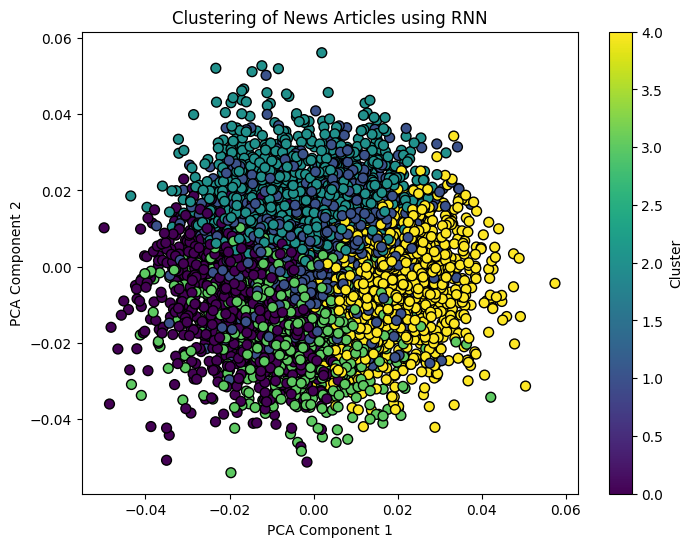

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Убедитесь, что необходимые ресурсы загружены
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

class TextPreprocessor:
    def __init__(self, language='english'):
        self.language = language
        self.stop_words = set(nltk.corpus.stopwords.words(language))
        self.lemmatizer = nltk.stem.WordNetLemmatizer()

    def clean_text(self, text):
        """Удаляет специальные символы и приводит текст к нижнему регистру."""
        text = text.lower()
        text = re.sub(r'[@#\$\%\^\&\*\(\)\[\]\{\}<>\\\/\+\=\-\:\;\,\.\'\"`~]', '', text)
        return text

    def remove_stopwords(self, text):
        """Удаляет стоп-слова из текста."""
        words = nltk.word_tokenize(text)
        words = [word for word in words if word not in self.stop_words]
        return ' '.join(words)

    def lemmatize_text(self, text):
        """Лемматизирует текст."""
        words = nltk.word_tokenize(text)
        lemmatized_words = [self.lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    def preprocess(self, text):
        """Объединяет все методы предварительной обработки."""
        if not text.strip():
            return None
        text = self.clean_text(text)
        text = self.remove_stopwords(text)
        text = self.lemmatize_text(text)
        return text

class DatasetSplitter:
    def __init__(self, df, text_column='cleaned_text', max_words=50000, max_len=250):
        self.df = df
        self.text_column = text_column
        self.max_words = max_words
        self.max_len = max_len
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, lower=True)

    def tokenize_and_pad(self):
        """Токенизирует текстовые данные и применяет паддинг."""
        self.tokenizer.fit_on_texts(self.df[self.text_column].values)
        sequences = self.tokenizer.texts_to_sequences(self.df[self.text_column].values)
        X = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=self.max_len)
        return X

# Основной блок программы
if __name__ == "__main__":
    # Загрузка датасета
    file_path = '/content/US-Economic-News.csv'
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Предварительная обработка текста
    preprocessor = TextPreprocessor()
    df['cleaned_text'] = df['text'].apply(lambda x: preprocessor.preprocess(str(x)) if pd.notnull(x) else None)

    # Удаление строк с пустым `cleaned_text`
    df.dropna(subset=['cleaned_text'], inplace=True)

    # Разделение данных
    splitter = DatasetSplitter(df, text_column='cleaned_text')
    X = splitter.tokenize_and_pad()

    # Создание и обучение модели RNN для извлечения признаков
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(splitter.max_words, 100),  # Входной слой эмбеддингов
        tf.keras.layers.LSTM(100, return_sequences=False)     # LSTM слой
    ])

    # Компиляция модели (без необходимости в loss, поскольку мы не обучаем её)
    model.compile(optimizer='adam')

    # Извлечение признаков
    features = model.predict(X)

    # Кластеризация с использованием KMeans на извлечённых признаках
    n_clusters = 5  # Измените при необходимости
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    df['cluster'] = kmeans.fit_predict(features)

    # Выводим информацию о кластерах
    print(df[['headline', 'cluster']].head())

    # Визуализация кластеров (по 2D)
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('Clustering of News Articles using RNN')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

## Другие задачи NLP

### 2. Анализ Настроения

**Задача**: Определить общее настроение текста, например, положительное, отрицательное или нейтральное.

### 4. Классификация Текста

**Задача**: Классификация текстов по заданным категориям (например, новостные статьи, научные статьи и т.д.).

### 5.Генерация текста

**Задача**: Автоматическая генерация текста на основе начальной строки или темы.


## Классифицировать экономические новости как релевантные или нерелевантные.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Загрузка необходимых ресурсов NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

class TextPreprocessor:
    def __init__(self, language='english'):
        self.language = language
        self.stop_words = set(stopwords.words(language))
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Удаляет специальные символы и приводит текст к нижнему регистру."""
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Удаляем любые символы, кроме букв и пробелов
        return text

    def remove_stopwords(self, text):
        """Удаляет стоп-слова из текста."""
        words = nltk.word_tokenize(text)
        words = [word for word in words if word not in self.stop_words]
        return ' '.join(words)

    def lemmatize_text(self, text):
        """Лемматизирует текст."""
        words = nltk.word_tokenize(text)
        lemmatized_words = [self.lemmatizer.lemmatize(word) for word in words]
        return ' '.join(lemmatized_words)

    def preprocess(self, text):
        """Объединяет все методы предварительной обработки."""
        if not text.strip():
            return None
        text = self.clean_text(text)
        text = self.remove_stopwords(text)
        text = self.lemmatize_text(text)
        return text

class DatasetSplitter:
    def __init__(self, df, text_column='cleaned_text', label_column='relevance', test_size=0.2, val_size=0.1, max_words=50000, max_len=250):
        self.df = df
        self.text_column = text_column
        self.label_column = label_column
        self.test_size = test_size
        self.val_size = val_size
        self.max_words = max_words
        self.max_len = max_len
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, lower=True)

    def tokenize_and_pad(self):
        """Токенизирует текстовые данные и применяет паддинг."""
        self.tokenizer.fit_on_texts(self.df[self.text_column].values)
        sequences = self.tokenizer.texts_to_sequences(self.df[self.text_column].values)
        X = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=self.max_len)

        # Изменяем метки на одномерные
        y = self.df[self.label_column].fillna(0).astype(int).values

        return X, y

    def split_dataset(self):
        """Разделяет датасет на обучающую, валидационную и тестовую выборки с помощью tf.data.Dataset."""
        X, y = self.tokenize_and_pad()
        dataset = tf.data.Dataset.from_tensor_slices((X, y))

        # Shuffle и split на train, validation, test
        dataset = dataset.shuffle(buffer_size=len(X))
        test_size = int(self.test_size * len(dataset))
        val_size = int(self.val_size * (len(dataset) - test_size))
        train_size = len(dataset) - test_size - val_size

        train_dataset = dataset.take(train_size)
        val_dataset = dataset.skip(train_size).take(val_size)
        test_dataset = dataset.skip(train_size + val_size)

        return train_dataset.batch(64), val_dataset.batch(64), test_dataset.batch(64)

# Остальной код программы остается прежним
if __name__ == "__main__":
    # Загрузка и обработка данных
    file_path = '/content/US-Economic-News.csv'
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Предварительная обработка текста
    preprocessor = TextPreprocessor()
    df['cleaned_text'] = df['text'].apply(lambda x: preprocessor.preprocess(str(x)) if pd.notnull(x) else None)
    df.dropna(subset=['cleaned_text'], inplace=True)

    # Преобразование метки "relevance" в числовой формат
    df['relevance'] = df['relevance'].map({'yes': 1, 'no': 0}).fillna(0).astype(int)

    # Разделение данных с использованием DatasetSplitter
    splitter = DatasetSplitter(df, text_column='cleaned_text', label_column='relevance')
    train_dataset, val_dataset, test_dataset = splitter.split_dataset()

    # Создание и обучение модели для классификации релевантности
    max_len = 250
    model_rel = tf.keras.Sequential([
        tf.keras.layers.Embedding(50000, 100, input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model_rel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Модель для классификации по релевантности:")
    print(model_rel.summary())

    # Обучение модели
    epochs = 5
    model_rel.fit(train_dataset, validation_data=val_dataset, epochs=epochs, verbose=1)

    # Оценка модели
    test_loss, test_accuracy = model_rel.evaluate(test_dataset)
    print(f"Тестовая точность: {test_accuracy * 100:.2f}%")

Модель для классификации по релевантности:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_6           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.8008 - loss: 0.5322 - val_accuracy: 0.8250 - val_loss: 0.4782
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8181 - loss: 0.4903 - val_accuracy: 0.8453 - val_loss: 0.4284
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8196 - loss: 0.4697 - val_accuracy: 0.8141 - val_loss: 0.4480
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8202 - loss: 0.4376 - val_accuracy: 0.8328 - val_loss: 0.3919
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8188 - loss: 0.4247 - val_accuracy: 0.8344 - val_loss: 0.3737
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.4199
Тестовая точность: 82.63%
